<a href="https://colab.research.google.com/github/zeruel91/DataAnalysis/blob/main/Analysis1_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

raw_data = pd.read_excel('titanic.xlsx')

In [2]:
raw_data = pd.read_excel('titanic.xlsx')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


KeyError: ignored

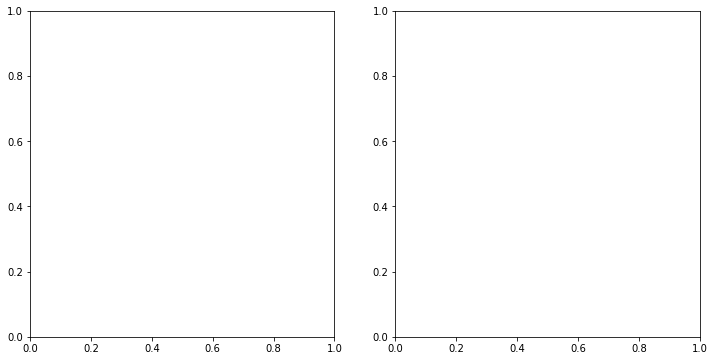

In [6]:
f,ax = plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0])

sns.countplot('survived', data=raw_data, ax=ax[1])


In [ ]:
f,ax = plt.subplots(1,2,figsize=(12,6))

raw_data['pclass'].value_counts().plot.pie(explode=[0.1,0.1,0.1], autopct='%1.2f%%',ax=ax[0])

sns.countplot('pclass', data=raw_data, ax=ax[1])

In [ ]:
raw_data['age'].hist(bins=20, figsize=(18,8), grid=False);

In [ ]:
raw_data.groupby('pclass').mean()
# 지정된 컬럼 index로 데이터를 재정렬한다. 

In [ ]:
raw_data.corr()
# corr()함수는 상관계수를 계산해주는 함수

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis)
plt.title('Correlation between features')

# 상관계수는 두 데이터 사이의 상관 관계만 확인하는 것으로 인과관계로 해석하면 안된다. 
# 선실등급(pclass)이 낮을 수록 생존율(survived)이 높아지는 관계가 있다는 것과 
# 선실등급(pclass)이 낮을 수록 탑승객의 나이가 많아진다를 것을 대략 볼 수 있다. 


In [ ]:
raw_data['age_cat'] = pd.cut(raw_data['age'],
                             bins = [0, 3, 7, 15, 30, 60, 100],
                             labels = ['baby','children','teenage','young','adult','old'])

In [ ]:
raw_data.groupby('age_cat').mean()

In [ ]:
# pclass별 생존survived
sns.barplot('pclass','survived',data=raw_data)



In [ ]:
# age_cat별 생존survived

sns.barplot('age_cat','survived',data=raw_data)

In [ ]:
# sex별 생존survived
sns.barplot('sex','survived',data=raw_data)

In [ ]:
plt.figure(figsize=[14,4])

# pclass별 생존survived
plt.subplot(131)
sns.barplot('pclass','survived',data=raw_data)
# age_cat별 생존survived
plt.subplot(132)
sns.barplot('age_cat','survived',data=raw_data)
# sex별 생존survived
plt.subplot(133)
sns.barplot('sex','survived',data=raw_data)

plt.show()

In [ ]:
# 성별 인원수(사람의 수) 와 성별 생존률

sns.countplot('sex',data=raw_data)


In [ ]:
sns.countplot('sex',hue='survived', data=raw_data)

In [ ]:

f, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot('sex',data=raw_data, ax=ax[0])
sns.countplot('sex',hue='survived', data=raw_data, ax=ax[1])
plt.show()

In [ ]:
# 보트 탑승 승객 생존율

# 보트 탑승 고객만 데이터 추출

boat_survivors = raw_data[raw_data['boat'].notnull()]

boat_survivors.head()

In [ ]:
# 보트 탑승자 생존률 그래프 (pie, countplot)


f,ax = plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0])
ax[0].set_ylabel('Survived')

sns.countplot('survived', data=boat_survivors, ax=ax[1])
ax[1].set_ylabel('Survived')

In [ ]:
# 귀족들만 조사
# 귀족들은 이름에 귀족을 확인할 수 있는 호칭이 포함되어 있다. 
raw_data['name']

In [ ]:
raw_data['name'][0].split(',')[1]   # 0번째 사람의 이름을 , 나누고 1번째(2번째)값을 선택

In [ ]:
raw_data['name'][0].split(',')[1].split('.')[0]

In [ ]:
conversion_rare = lambda x : x.split(',')[1].split('.')[0].strip()

raw_data['title'] = raw_data['name'].map(conversion_rare)

In [ ]:
titles = raw_data['title'].unique()

In [ ]:
titles

In [ ]:
raw_data

In [ ]:
pd.crosstab(raw_data['title'],raw_data['sex'])

In [ ]:
raw_data['title'] = raw_data['title'].replace('Mlle','Miss')
raw_data['title'] = raw_data['title'].replace('Ms','Miss')
raw_data['title'] = raw_data['title'].replace('Mme','Mrs')


'Lady','the Countess','Countess','Capt','Master',
'Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'

'Rare'


raw_data['title'].unique()

Miss Rare Mr Mrs

In [ ]:
pd.crosstab(raw_data['title'],raw_data['sex'])

In [ ]:
# 학습을 위한 데이터 정리 / 특징 선택

# 남성과 여성 으로 학습을 하려면 문자 -> 숫자로 변경

tmp = []
for each in raw_data['sex']:
  if each == 'female':
    tmp.append(0)
  elif each == 'male':
    tmp.append(1)
  else:
    tmp.append(np.nan)


In [ ]:
raw_data['sex'] = tmp

raw_data.head(10)

In [ ]:
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

In [ ]:
raw_data.head()

In [ ]:
# NaN을 빼고 다시 저장 

raw_data.info()

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()

In [8]:
train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']]
train_pre

# 상관계수, 그림까지 (heatmap)   Quiz 8 

KeyError: ignored

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train_pre.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title("whatthe..")

NameError: ignored

<Figure size 1080x1080 with 0 Axes>